# Practices with concurrently reporting foundation systems

## Why?
- Practices going through migration will have multiple foundation systems active simultaneously
- We have noticed in the MI data, from the header records, that for the same practice (i.e. the same ODS code), there may be MI data received from two different supplier systems on the same day
- We hypothesise that this is due to the practice undergoing migration, and that while GP2GP is switched off for transferring patient records during this time, the foundation systems are nonetheless reporting (empty) MI data.
- Thus: we believe we may be able to use these records to understand how long it takes practices to migrate.

## NMS Query: (Run from April 1st - September 30th 2019)
```
index="gp2gp-mi" sourcetype="gppractice-HR"
| rex field=RequestorSoftware "(?<Supplier>.*)_(?<System>.*)_(?<Version>.*)"
| stats count BY RequestorODS, ReportTimePeriod
| search count=2
| stats min(ReportTimePeriod) as From,
        max(ReportTimePeriod) as To,
        count
        BY RequestorODS
```

## Notes:
- note that becasue the query is run over a limited window, we are under-estimating the number of days with concurrent reports for some practices (i.e. those for which the 'concurrent period' overlaps with the edge of the analysis window).

In [1]:
%load_ext autoreload
%autoreload 2
import paths

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
import data

In [4]:
df = pd.read_csv(data.practices_with_concurrently_reporting_foundation_systems.path)

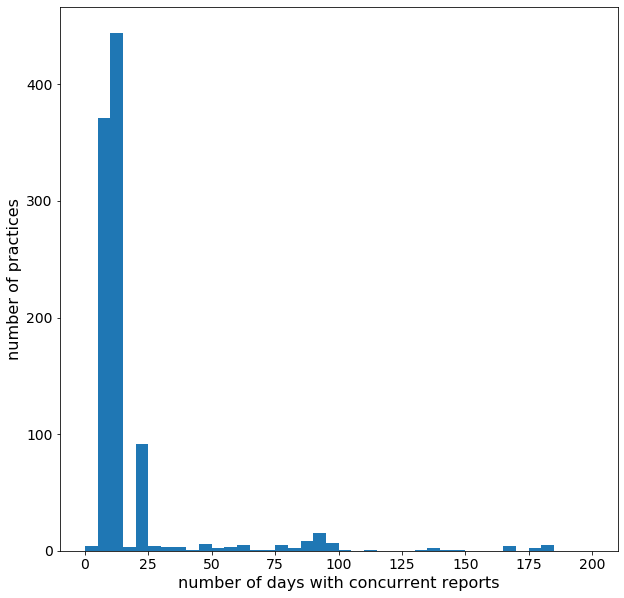

In [5]:
df[["count"]].plot.hist(
    bins=np.linspace(0, 200, 200/5 + 1),
    figsize=(10,10),
    legend=False
);
plt.ylabel("number of practices", fontsize=16)
plt.yticks(fontsize=14);
plt.xlabel("number of days with concurrent reports", fontsize=16)
plt.xticks(fontsize=14);

plt.savefig("../temp_outputs/concurrent_reporting_foundation_systems.png");